# Report 3
## Computational Neuroscience
## Computer Assignment 3
### Aref Afzali
### 610098014

In [1]:
%matplotlib notebook
import torch
import numpy as np

In [2]:
from cnsproject.network.neural_populations import LIFPopulation
from cnsproject.plotting.plotting import plotting
from cnsproject.utils import step_function, two_way_step_function, random_step_function
from cnsproject.network.monitors import Monitor
from cnsproject.network.connections import DenseConnection

## Global Variables

$time$ parameter shows how often (seconds\*scale/dt) we want to run our neuron. $dt$ means with what resolution ($scale$) we want our seconds move forward. I used 10 neurons for start and split them into two part which first part representing the excitatory population with 0.8\*N number of neurons and the second part that is representing the inhibitoy population has 0.2\*N neurons.

In [3]:
time = 1500
scale = 100
dt = 1
neuron_size = 10
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

## Walkthrough

The default implemented model is a fully connected and homogeneous population. 

First we need to specify the input current.

In [4]:
I1 = step_function(time = time, I_value = 3, scale = scale)
I2 = I1

Then two LIF Population created withe shapes that we talked about. $np1$ population is the excitatory population and $np2$ is the inhibitory population.

In [5]:
pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt

pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

Here we creat connection between the the two population.

In [6]:
con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con1.dt = dt

con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt

For monitoring the 2 population, two $Monitor$ created.

In [7]:
monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()

monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

In this step first one population starts and will forward but before the next population forwarding, we need to compute the current that effects the other populations. This will continue till the end.

In [8]:
I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


In the end lets plot the output.

<IPython.core.display.Javascript object>


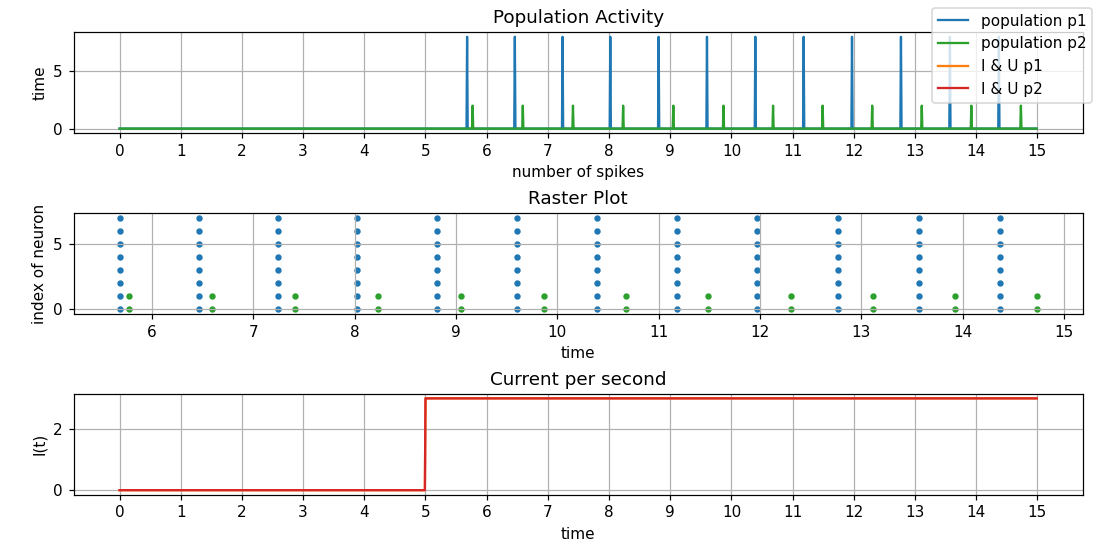

In [9]:
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

## Population Behavior

### Isolate Populations
It's better to see the population activity when there is no connection between them.

<IPython.core.display.Javascript object>


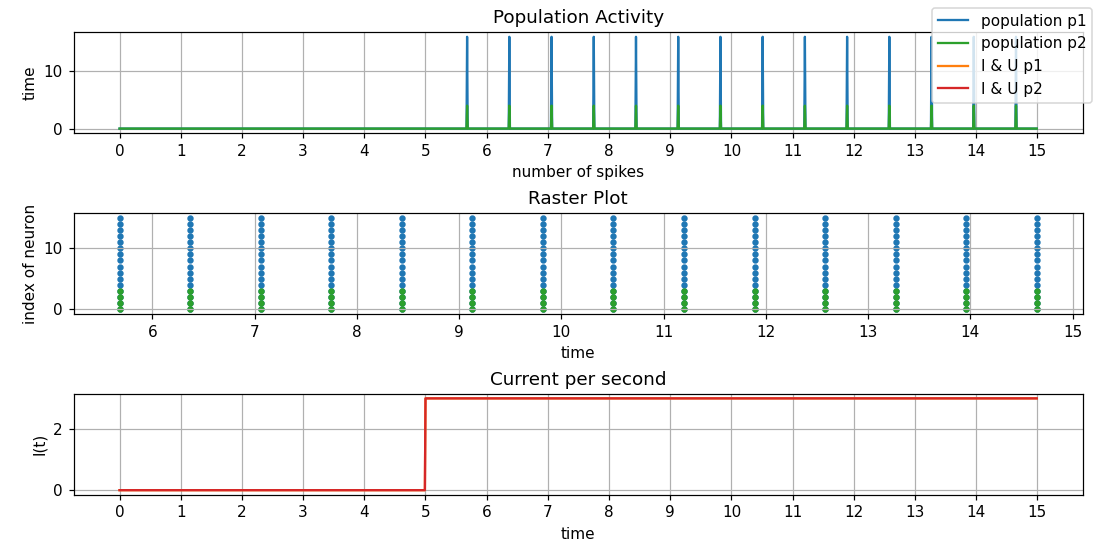

In [24]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = step_function(time = time, I_value = 3, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

for i in range(len(I1)):
    pn1.forward(I1[i])
    pn2.forward(I2[i])
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Connected Populations
In this part we have the two same populations from previous part, but the only difference is they are connected. the second population is inhibitory. As we can see the effect of connection is showing that the populations have distance and they are getting farther becaus I used a parameter ($trace_scale$) to achieve the additive behavior.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


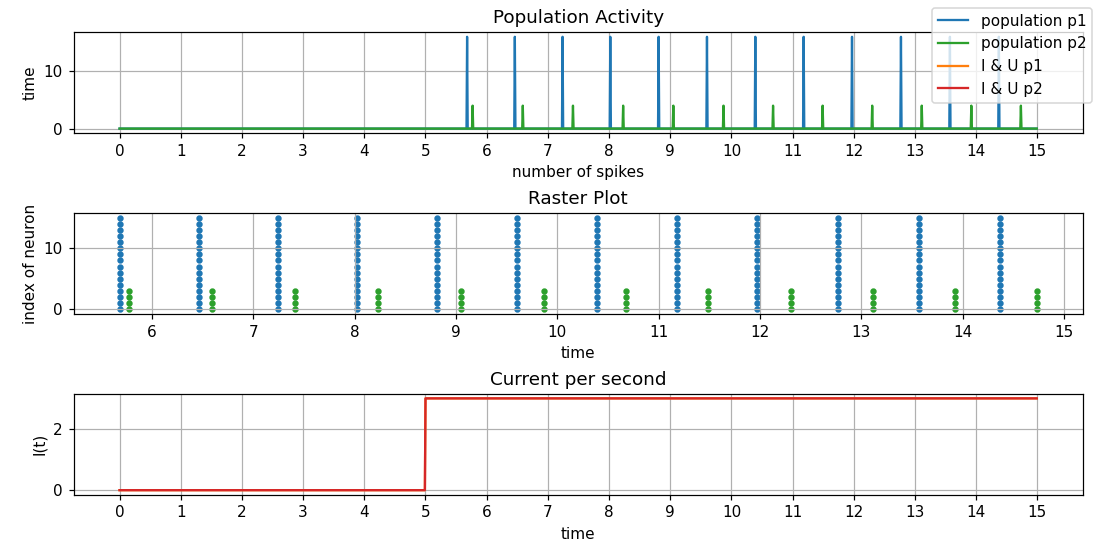

In [26]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = step_function(time = time, I_value = 3, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Affect of $tau\_s$
In this part the effect of $tau\_s$ is clear. This parameter affects in the decaying. and increasing it will cause the decay to become zero.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


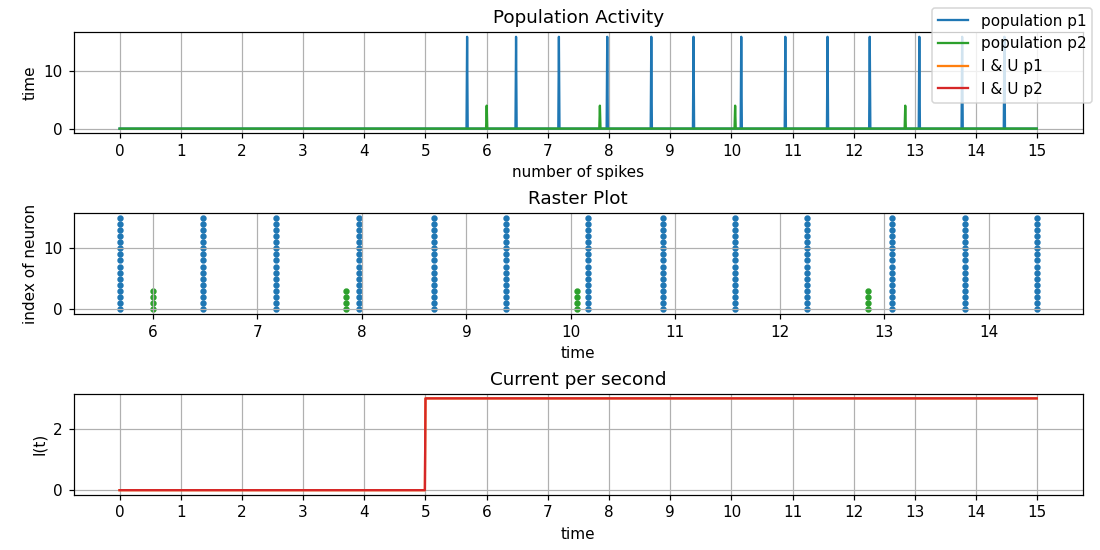

In [12]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = step_function(time = time, I_value = 3, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 50, trace_scale = 1., dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Affect of $trace\_scale$
As I said before, $trace\_scale$ will change the additivity of the trace. By increasing this parameter, the adaptation of these neurons will become easier.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


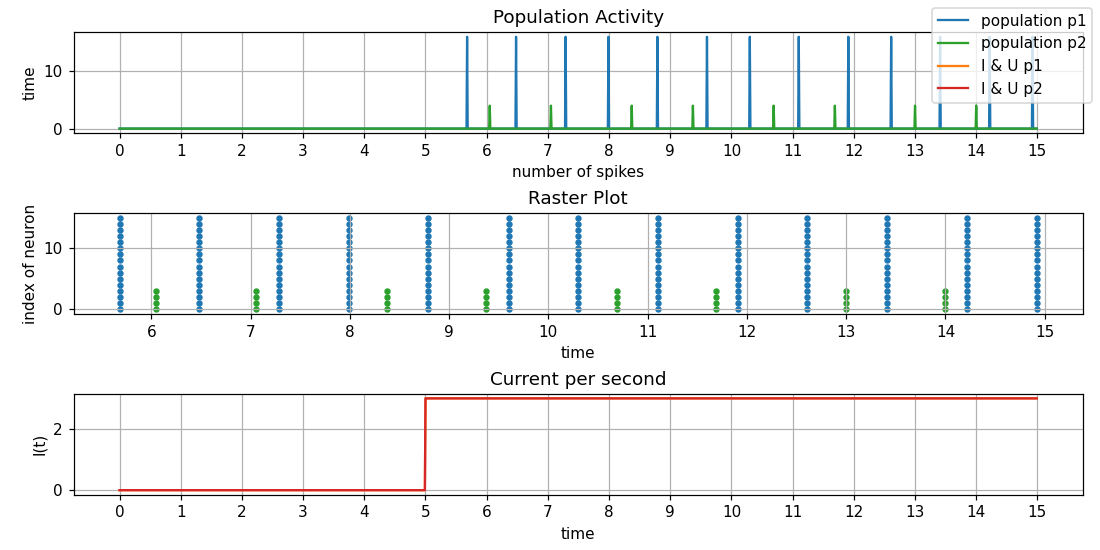

In [15]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = step_function(time = time, I_value = 3, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 3, dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Affect of $J$
The $J$ parameter has a linear relationship with the weights of connection between each pair of neurons. By increasing this parameter the effect of the other population will increase. As we can see the distance between the populations gets longer.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


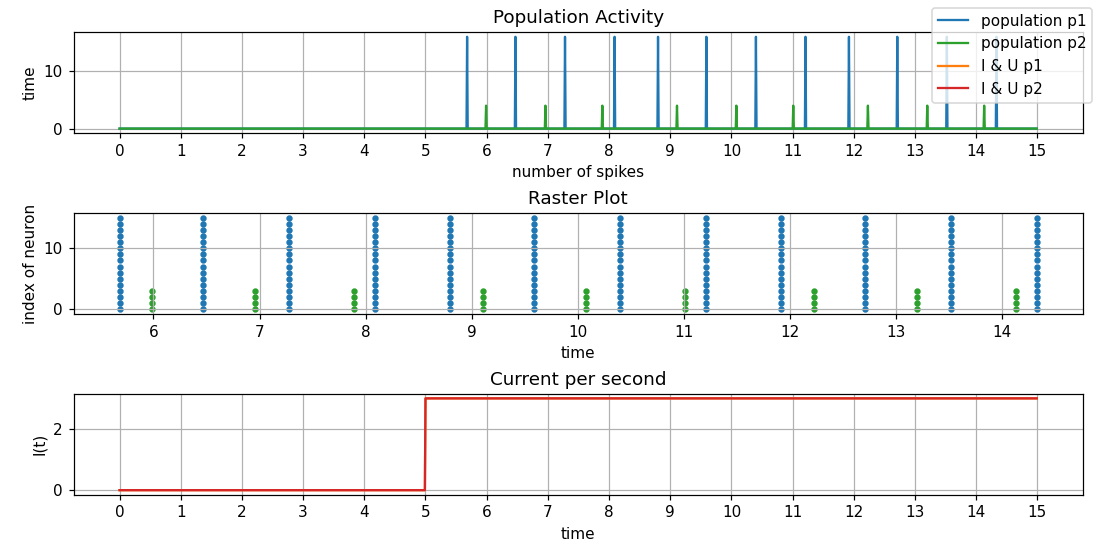

In [16]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = step_function(time = time, I_value = 3, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 5, tau_s = 10, trace_scale = 1, dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Affect of excitatory
If we change the nature (excitatory and inhibitory) of a population, as we expected, they amplify each other.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


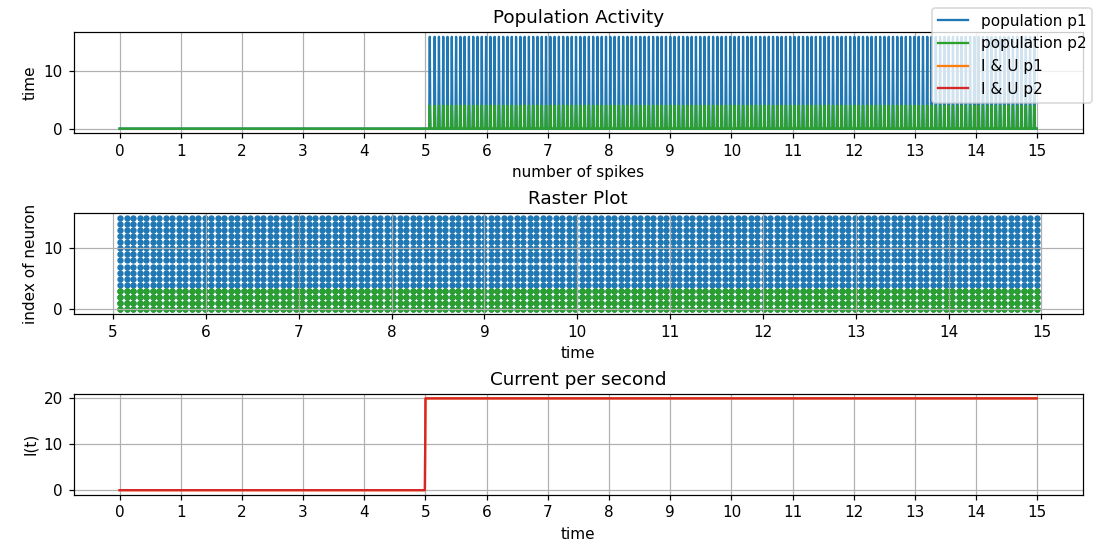

In [23]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = step_function(time = time, I_value = 20, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1, dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]+I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]+I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Random Input
If we change the input current to a random function, we can observe some behavior like below.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


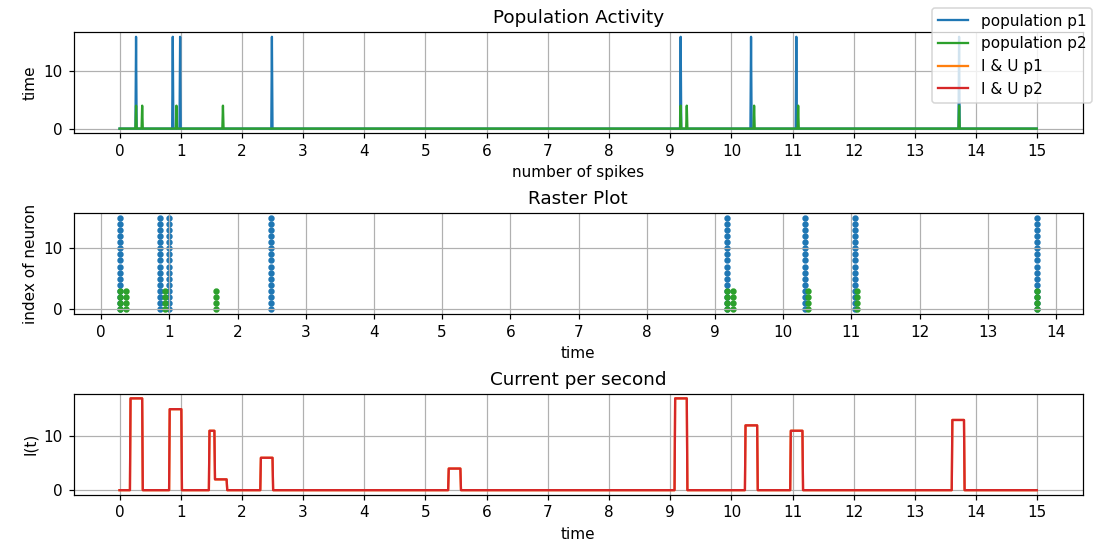

In [20]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = random_step_function(time = time, I_value = 20, scale = scale)
I2 = I1

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1, dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()

### Two Random Current
If we change the second population's current, the population is no longer Homogeneous and became hetergeneous. Lets have a berief and short review of this change.

/home/aref/Desktop/projects/UT/Computational_Neuroscience/package/cnsproject/network/neural_populations.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dt = torch.tensor(self.dt)


<IPython.core.display.Javascript object>


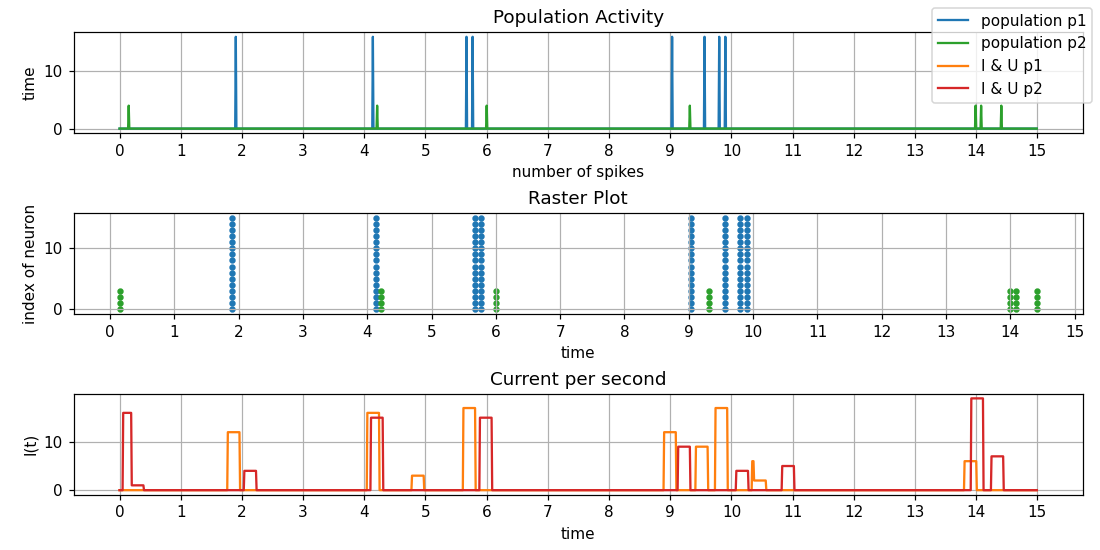

In [28]:
time = 1500
scale = 100
dt = 1
neuron_size = 20
shape1 = (int(neuron_size*0.8),)
shape2 = (int(neuron_size*0.2),)

I1 = random_step_function(time = time, I_value = 20, scale = scale)
I2 = random_step_function(time = time, I_value = 20, scale = scale)

pn1 = LIFPopulation(
        shape = shape1, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn1.dt = dt
pn2 = LIFPopulation(
        shape = shape2, spike_trace = True, additive_spike_trace = True, tau_s = 10, trace_scale = 1.,
        is_inhibitory = False, learning = False, R = 10, C = 10, threshold = -55
    )
pn2.dt = dt

con1 = DenseConnection(
        pre = pn1, post = pn2, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1, dt = dt
    )
con1.dt = dt
con2 = DenseConnection(
        pre = pn2, post = pn1, lr = None, weight_decay = 0.0,
        J = 2, tau_s = 10, trace_scale = 1., dt = dt
    )
con2.dt = dt


monitor1 = Monitor(pn1, state_variables=["s", "u"])
monitor1.set_time_steps(time, dt)
monitor1.reset_state_variables()
monitor2 = Monitor(pn2, state_variables=["s", "u"])
monitor2.set_time_steps(time, dt)
monitor2.reset_state_variables()

I_pop=0
for i in range(len(I1)):
    pn1.forward(I1[i]-I_pop)
    I_pop = con1.compute()
    pn2.forward(I2[i]-I_pop)
    I_pop = con2.compute()
    monitor1.record()
    monitor2.record()

s1 = torch.transpose(monitor1.get("s")*1, 0, 1)
s2 = torch.transpose(monitor2.get("s")*1, 0, 1)
plot = plotting()
plot.plot_population_activity_init(time/scale)
plot.plot_population_activity_update(s1, I1, "p1")
plot.plot_population_activity_update(s2, I2, "p2")
plot.show()